In [56]:
import pandas as pd
import numpy as np

In [57]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [58]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [59]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)

In [60]:
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [61]:
data['1950':'1952'] #What do you notice about the range of dates?

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [64]:
# What is the empirical range of dates?
print(f"min of the date is {min(data.index)}")
print(f"max of the date is {max(data.index)}")

min of the date is 1950-01-01 00:00:00
max of the date is 2020-11-01 00:00:00


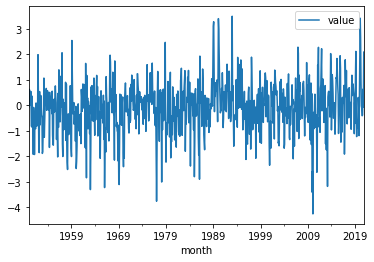

In [65]:
# How to visualize?
data.plot()

In [66]:
# What kind of index do we have?
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [67]:
data['1951-11-11':'1951-11-12']

,value
month,


In [68]:
# What if we want a period index?
data_pd = data.to_period()

In [69]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.068519


In [70]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


In [71]:
# Which is more appropriate for this data?
# since every datapoint is on the first day of the month, `period` is more appropiate

In [72]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
1 loop, best of 3: 648 ms per loop
infer_datetime_format = False, no date parser
1 loop, best of 3: 647 ms per loop
infer_datetime_format = True, date parser provided


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # This is added back by InteractiveShellApp.init_path()


1 loop, best of 3: 664 ms per loop
infer_datetime_format = False, date parser provided


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  from ipykernel import kernelapp as app


1 loop, best of 3: 665 ms per loop


In [73]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [74]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [75]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [77]:
# Does it work with other column names?
# No, it doesnt'

# df_renamed = pd.DataFrame({'y': [2015, 2016],'m': [2, 3],'d': [4, 5],'h': [2, 3]})
# pd.to_datetime(df_renamed[['year', 'month', 'day']])


In [78]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [79]:
# 1. plot 2. get range of dates 3. convert between time and period index

In [80]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int64

In [81]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [83]:
# It will save you when it can
ts[0:10:2].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')